# 5. Real-world datasets

This module will go through examples using real-world datasets that contain noisy human annotations. We will primarily focus on using the CIFAR-N dataset.

### Synthetic label noise v.s. Real-world label noise

**Synthetic label noise**

* Pro: Widely adopted settings which greatly enable statistical analyses.

* Con: Fail to model real-world noise patterns.

**Real-world noisy datasets**

* Pro: More realistic \& natural.

* Con: Often lack of ground-truth labels for verification.

* Con: Large scale data may lead to unfair comparisons.

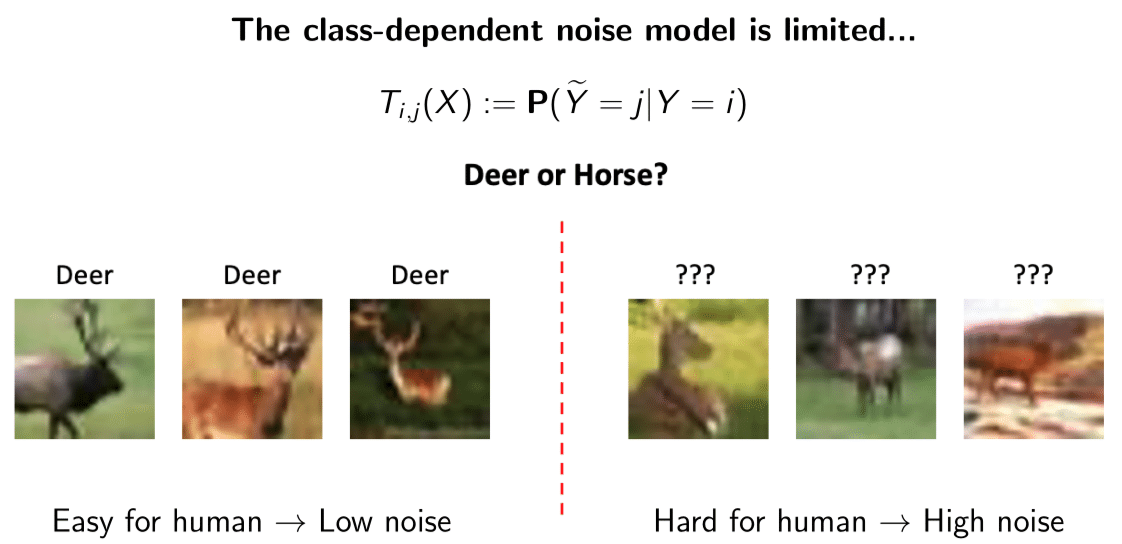

In [1]:
from IPython.display import Image
display(Image(filename='tutorial_imgs/limit.png', width = 750, height = 400))

### 